Accuracy score sklearn: 1.0 | Our score: 1.0 (CLASSIFIER)
MSE sklearn: 3.3 | Our MSE: 3.3 (REGRESSOR)


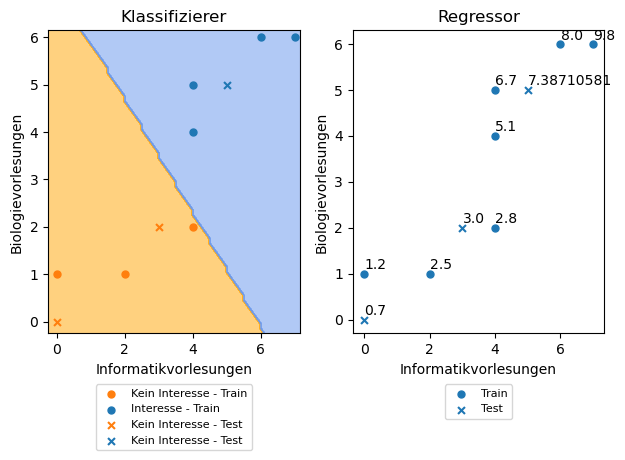

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

class KNNRegressor(object):
    def __init__(self, k, dist_function):
        self.k = k
        self.dist_function = dist_function
        self.X = None
        self.y = None

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X_new): # X_new: Predict test data

        predictions = []

        if not isinstance(X_new, list) and not isinstance(X_new, np.ndarray):
            X_new = [X_new]
        
        for point in X_new:
            distances = self.dist_function(self.X, point)
            sorted_distances = np.argsort(distances)
            kNearest = self.y[sorted_distances[:self.k]]
            predictions.append(np.mean(kNearest))
        
        return np.array(predictions)

class KNNClassifier(object):
    def __init__(self, k, dist_function):
        self.k = k
        self.dist_function = dist_function
        self.X = None
        self.y = None

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X_new):

        predictions = []

        if not isinstance(X_new, list) and not isinstance(X_new, np.ndarray):
            X_new = [X_new]
        
        for point in X_new:
            distances = self.dist_function(self.X, point) # [4, 7, 1, 2, 8]
            sorted_distances = np.argsort(distances) # [2, 3, 0, 1, 4]
            kNearest = self.y[sorted_distances[:self.k]] # [0, 1, 0, 0, 1]
            predcited_class = np.argmax(np.bincount(kNearest)) # binCount: [3, 2] | argmax [3, 2] => 0
            predictions.append(predcited_class)
        
        return np.array(predictions)

def distance(a, b):
    return np.sqrt(np.sum(np.square(a - b), axis=-1, keepdims=False))

informatik = np.array([0, 0, 2, 3, 4, 4, 4, 5, 6, 7])
bio = np.array([0, 1, 1, 2, 2, 4, 5, 5, 6, 6])

X = np.c_[informatik, bio]
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]

X_test_0 = X_test[y_test == 0]
X_test_1 = X_test[y_test == 1]

classifier = KNNClassifier(5, distance)
classifier.fit(X_train, y_train)

sklearn_classifier = KNeighborsClassifier()
sklearn_classifier.fit(X_train, y_train)

accScore = accuracy_score(y_test, classifier.predict(X_test))
sklearn_accScore = accuracy_score(y_test, sklearn_classifier.predict(X_test))

print(f"Accuracy score sklearn: {sklearn_accScore} | Our score: {accScore} (CLASSIFIER)")

res = 0.1

x_max, y_max = np.max(X, axis=0) + 0.25
x_min, y_min = np.min(X, axis=0) - 0.25

cmap_light = ListedColormap(["orange", "cornflowerblue"])

grid_x, grid_y = np.meshgrid(np.arange(x_min, x_max, res), np.arange(y_min, y_max, res))
grid_input = np.c_[grid_x.reshape(-1), grid_y.reshape(-1)]

grid_out = classifier.predict(grid_input).reshape(grid_x.shape)

#-------------------------- Regression

y_r = np.array([0.7, 1.2, 2.5, 3, 2.8, 5.1, 6.7, 7.38710581, 8, 9.8])
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_r, test_size=0.25, random_state=12345)

regressor = KNNRegressor(5, distance)
regressor.fit(X_train_r, y_train_r)

sklearn_regressor = KNeighborsRegressor()
sklearn_regressor.fit(X_train_r, y_train_r)

mse = mean_squared_error(y_test_r, regressor.predict(X_test_r))
sklearn_mse = mean_squared_error(y_test_r, sklearn_regressor.predict(X_test_r))

print(f"MSE sklearn: {sklearn_mse:.1f} | Our MSE: {mse:.1f} (REGRESSOR)")

#--------------- Random predictions ----------------- #

#X_new = np.random.randint(0, 10, size=(10, 2))

#predictions = classifier.predict(X_new)

#predictions_0 = X_new[predictions == 0]
#predictions_1 = X_new[predictions == 1]

#plt.scatter(predictions_0[:, 0], predictions_0[:, 1], label="Vorhersage - Kein Interesse", marker="*", s=125, c="#ff7f0e")
#plt.scatter(predictions_1[:, 0], predictions_1[:, 1], label="Vorhersage - Interesse", marker="*", s=125, c="#1f77b4")

# --------------------------------------------------- #

fig, ax = plt.subplots(ncols=2, nrows=1)

ax[0].set_title("Klassifizierer")

ax[0].contourf(grid_x, grid_y, grid_out, alpha=0.5, cmap=cmap_light)
ax[0].scatter(X_train_0[:, 0], X_train_0[:, 1], label="Kein Interesse - Train", s=25, c="#ff7f0e")
ax[0].scatter(X_train_1[:, 0], X_train_1[:, 1], label="Interesse - Train", s=25, c="#1f77b4")
ax[0].scatter(X_test_0[:, 0], X_test_0[:, 1], label="Kein Interesse - Test", marker="x", s=25, c="#ff7f0e")
ax[0].scatter(X_test_1[:, 0], X_test_1[:, 1], label="Kein Interesse - Test", marker="x", s=25, c="#1f77b4")

ax[0].set_xlabel("Informatikvorlesungen")
ax[0].set_ylabel("Biologievorlesungen")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=8)

ax[1].set_title("Regressor")

ax[1].scatter(X_train_r[:,0], X_train_r[:,1], label="Train", s=25, c="#1f77b4")
ax[1].scatter(X_test_r[:,0], X_test_r[:,1], label="Test", marker="x", s=25, c="#1f77b4")

for i in range(10):
    ax[1].annotate(y_r[i], (X[i][0]+0.01, X[i][1]+0.1))

ax[1].set_xlabel("Informatikvorlesungen")
ax[1].set_ylabel("Biologievorlesungen")
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), fontsize=8)


fig.tight_layout()
plt.show()
plt.close



